<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [69]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-02-20 00:40:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolvendo cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Conectando-se a cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 36679680 (35M) [application/octet-stream]
Salvando em: “m4_survey_data.sqlite.4”

m4_survey_data.sqli 100%[===================>]  34,98M  1,88MB/s    em 15s     

2022-02-20 00:40:53 (2,29 MB/s) - “m4_survey_data.sqlite.4” salvo [36679680/36679680]



Connect to the database.


In [70]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [71]:
import pandas as pd

In [72]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Demo: How to run an sql query


In [73]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [74]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [75]:
QUERY = '''
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
'''
df_age = pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [76]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


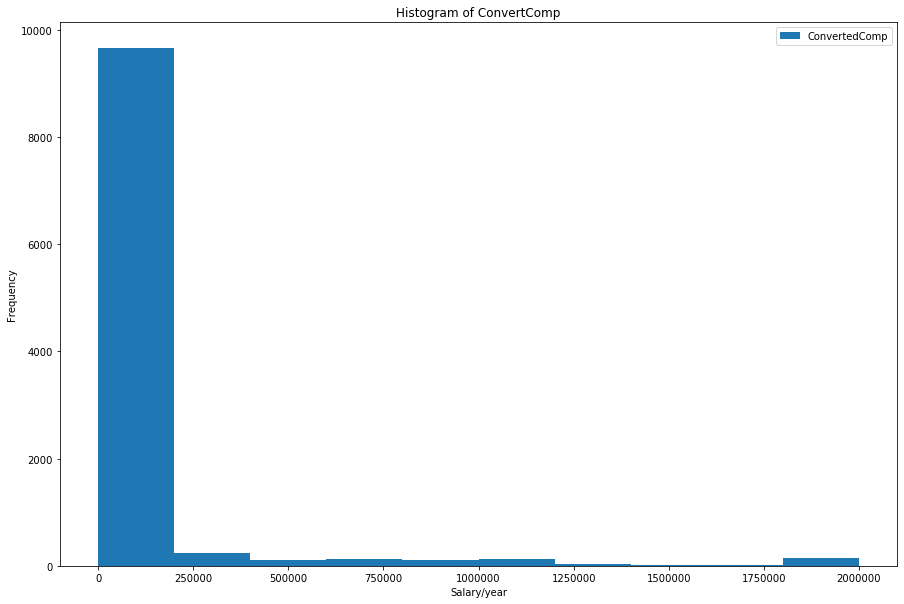

In [77]:
QUERY = '''
SELECT ConvertedComp
FROM master
'''
df_ConvertedComp = pd.read_sql_query(QUERY,conn)

#d = df['ConvertedComp']

df_ConvertedComp.plot(kind='hist', figsize=(15, 10))

# add a title to the histogram
plt.title('Histogram of ConvertComp')
# add y-label
plt.ylabel('Frequency')
# add x-label
plt.xlabel('Salary/year')

plt.show()


### Box Plots


Plot a box plot of `Age.`


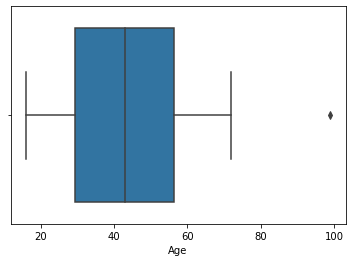

In [78]:
# your code goes here
sns.boxplot(x="Age",data=df_age)

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


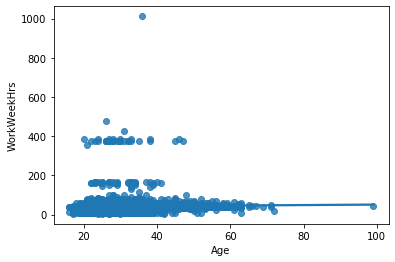

In [79]:
QUERY = '''
SELECT Age,WorkWeekHrs
FROM master
'''
df_scatter = pd.read_sql_query(QUERY,conn)

sns.regplot(x="Age", y="WorkWeekHrs", data=df_scatter)



In [80]:
df_scatter.corr()

,Age,WorkWeekHrs
Age,1.000000,0.036517
WorkWeekHrs,0.036517,1.000000


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [81]:
QUERY = '''
SELECT WorkWeekHrs,CodeRevHrs,Age
FROM master WHERE WorkWeekHrs < 200 and CodeRevHrs < 80
'''
df_bubble = pd.read_sql_query(QUERY,conn)


# normalize WorkWeekHrs data
#df_bubble['WorkWeekHrs'] = (df_bubble['WorkWeekHrs'] - df_bubble['WorkWeekHrs'].min()) / (df_bubble['WorkWeekHrs'].max() - df_scatter[

# normalize CodeRevHrs data
#df_bubble['CodeRevHrs'] = (df_bubble['CodeRevHrs'] - df_bubble['CodeRevHrs'].min()) / (df_bubble['CodeRevHrs'].max() - df_scatter['CodeRevHrs'].min())

# normalize Age data
#f_bubble['Age'] = (df_bubble['Age'] - df_bubble['Age'].min()) / (df_bubble['Age'].max() - df_bubble['Age'].min())

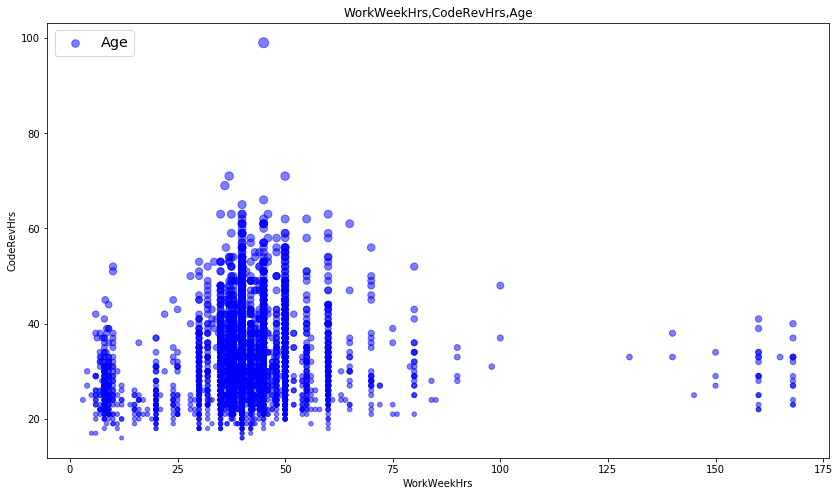

In [82]:
# Age
ax0 = df_bubble.plot(kind='scatter',
                    x='WorkWeekHrs',
                    y='Age',
                    figsize=(14, 8),
                    alpha=0.5,
                    color="blue",
                    s='Age',
                    #ax=ax0
                    )

ax0.set_ylabel('CodeRevHrs')
ax0.set_title('WorkWeekHrs,CodeRevHrs,Age')
ax0.legend(['Age'], loc='upper left', fontsize='x-large')


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [83]:
QUERY = '''
SELECT DatabaseDesireNextYear as Database,COUNT(Respondent) as Respondents
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Respondents DESC
LIMIT 5
'''
df_pie = pd.read_sql_query(QUERY,conn)


In [84]:
QUERY = '''
SELECT LanguageWorkedWith as Database,COUNT(Respondent) as Respondents
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY Respondents DESC
LIMIT 5
'''
#df_pie = pd.read_sql_query(QUERY,conn)

In [85]:
QUERY = '''
SELECT DevType as Database,COUNT(Respondent) as Respondents
FROM DevType
GROUP BY DevType
ORDER BY Respondents DESC
LIMIT 5
'''
#df_pie = pd.read_sql_query(QUERY,conn)

In [86]:
#PARA BUSCAR OS QUE TRABALHAM SÓ COM MYSQL
#(IMCOMPLETO AINDA)

#QUERY = '''
#SELECT DatabaseWorkedWith as Database,COUNT(Respondent) as Respondents
#FROM DatabaseWorkedWith
#WHERE Database like 'MySQL'
#GROUP BY DatabaseWorkedWith#
#'''
#df_pie = pd.read_sql_query(QUERY,conn)


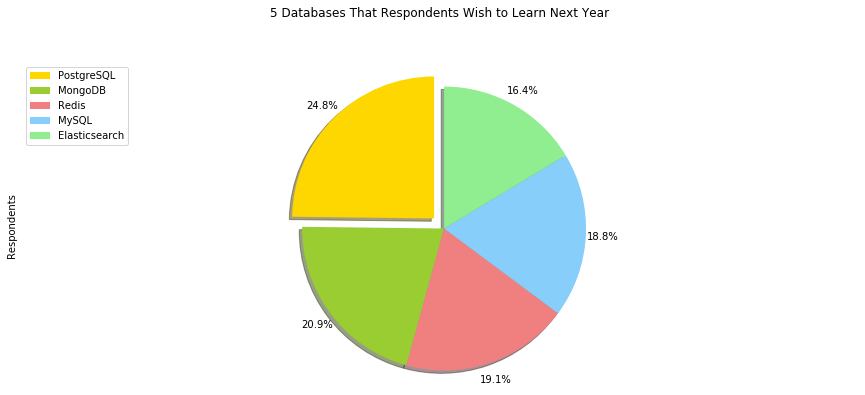

In [87]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']


explode_list = [0.1, 0, 0, 0, 0] #0.1, the exploded. liste: ratio for each database with which to offset each wedge.
df_pie['Respondents'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 4 databases
                            )

# scale the title up by 12% to match pctdistance
plt.title('5 Databases That Respondents Wish to Learn Next Year', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_pie['Database'], loc='upper left') 

plt.show()

In [88]:
df_pie

,Database,Respondents
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [93]:
# your code goes here
QUERY = '''
SELECT WorkWeekHrs,CodeRevHrs,age
FROM master WHERE age between 30 and 35
'''
df_sql = pd.read_sql_query(QUERY,conn)
df_stacked = df_sql.groupby(['Age']).median().reset_index()
df_stacked

,Age,WorkWeekHrs,CodeRevHrs
0,30.0,40.0,4.0
1,31.0,40.0,4.0
2,32.0,40.0,4.0
3,33.0,40.0,4.0
4,34.0,40.0,4.0
5,35.0,40.0,4.0


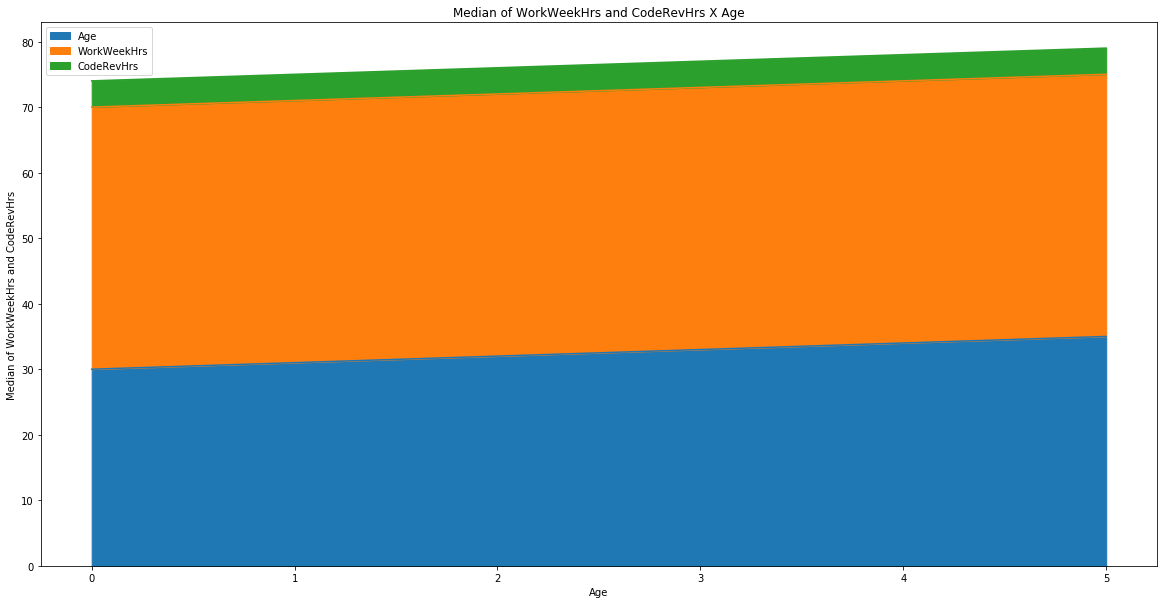

In [94]:
# let's change the index values of df_top5 to type integer for plotting
#df_stacked.index = df_stacked.index.map(int)
df_stacked.plot(kind='area',
             stacked=True,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Median of WorkWeekHrs and CodeRevHrs X Age')
plt.ylabel('Median of WorkWeekHrs and CodeRevHrs')
plt.xlabel('Age')

plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


## ATENTION: If the DataFrame has a multiIndex(2 lines de index or more), reset_index() can remove the boring situation. This problem happens with the 'groupby'

In [50]:
UERY = '''
SELECT ConvertedComp,Age
FROM master
WHERE age BETWEEN 45 AND 60
'''
df_sql = pd.read_sql_query(QUERY,conn)
df_line = df_sql.groupby(['Age']).median().reset_index()
df_line.columns = ['Age', 'MedianConvComp']
df_line

,Age,MedianConvComp
0,45.0,90330.0
1,46.0,91593.0
2,47.0,91606.0
3,48.0,105750.0
4,49.0,85248.0
5,50.0,95000.0
6,51.0,100000.0
7,52.0,105500.0
8,53.0,100463.0
9,54.0,121000.0


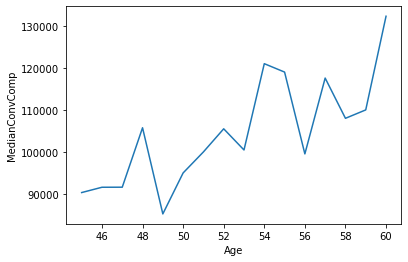

In [58]:
sns.lineplot(data=df_line, x="Age", y="MedianConvComp")

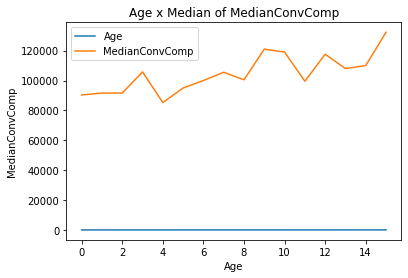

In [52]:
df_line.plot(kind='line')

plt.title('Age x Median of MedianConvComp')
plt.ylabel('MedianConvComp')
plt.xlabel('Age')
plt.show()

,Age,MedianConvComp
Age,1.000000,0.773278
MedianConvComp,0.773278,1.000000


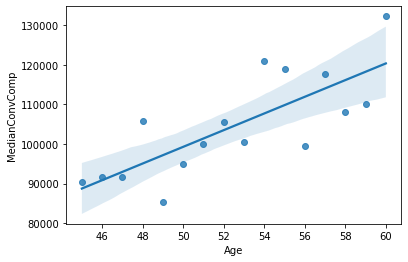

In [63]:
sns.regplot(x="Age", y="MedianConvComp", data=df_line)


df_line.corr()

,ConvertedComp,Age
ConvertedComp,1.00000,0.02825
Age,0.02825,1.00000


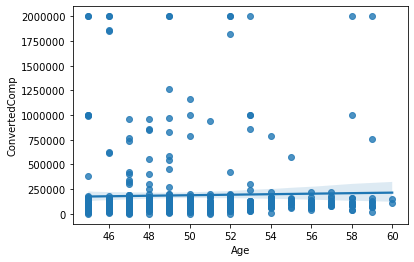

In [99]:
QUERY = '''
SELECT ConvertedComp,Age
FROM master
WHERE age BETWEEN 45 AND 60
'''
df_sql = pd.read_sql_query(QUERY,conn)
sns.regplot(x="Age", y="ConvertedComp", data=df_sql)
df_sql.corr()

,Age,MeanConvComp
Age,1.000000,0.176813
MeanConvComp,0.176813,1.000000


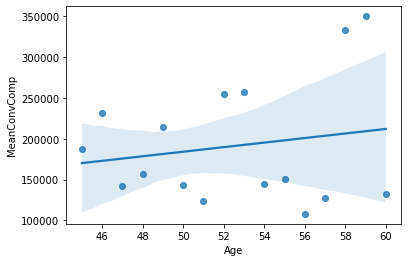

In [103]:
df_line = df_sql.groupby(['Age']).mean().reset_index()
df_line.columns = ['Age', 'MeanConvComp']
sns.regplot(x="Age", y="MeanConvComp", data=df_line)
df_line.corr()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [119]:
# your code goes here
QUERY = '''
SELECT Respondent as Amount,MainBranch
FROM master
GROUP BY MainBranch
'''
df_bar = pd.read_sql_query(QUERY,conn)

In [121]:
#df_bar.value_counts()
#df_bar['MainBranch'].astype(object)

df_bar

,MainBranch,Amount
0,I am a developer by profession,4
1,"I am not primarily a developer, but I write co...",20


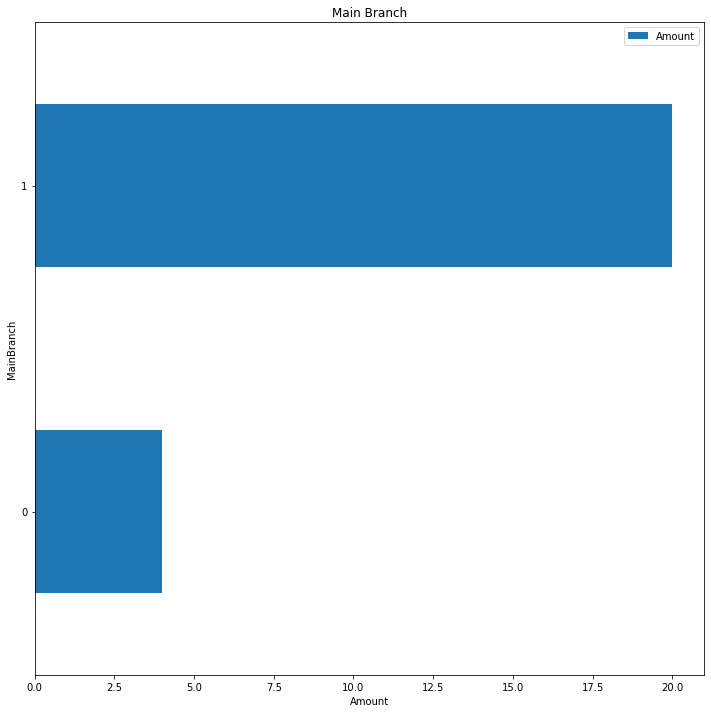

In [123]:
df_bar.plot(kind='barh', figsize=(12, 12))

plt.ylabel('MainBranch') # add to x-label to the plot
plt.xlabel('Amount') # add to x-label to the plot
plt.title('Main Branch') # add title to the plot


'''
    # annotate value labels to each country
for index, value in enumerate(df_bar): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
'''



plt.show()

In [56]:
df_line.to_csv('age-ConvertedComp.csv')

Close the database connection.


In [57]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
